# Tutorial: multiome (scRNA-seq + scATAC-seq) data

We show an example of scRNA-seq data produced by 10X Chromium. 
We are using scATAC-seq data `PBMC from a Healthy Donor - No Cell Sorting (3k)` (3,009 cells and 117,757 features) from [10X Genomics Datasets](https://www.10xgenomics.com/resources/datasets). The test data is directly available from `Peak by cell matrix HDF5 (filtered)` in [here](https://www.10xgenomics.com/resources/datasets/pbmc-from-a-healthy-donor-no-cell-sorting-3-k-1-standard-2-0-0) (registration required).

We use [scanpy](https://scanpy.readthedocs.io/en/stable/) to read/write 10X data. Import numpy and scanpy in addlition to screcode.

In [1]:
import screcode
import numpy as np
import scanpy as sc

Read in the count matrix into an [AnnData](https://anndata.readthedocs.io/en/latest/) object. 

In [2]:
input_filename = 'data/pbmc_unsorted_3k_filtered_feature_bc_matrix.h5'
adata = sc.readwrite._read_v3_10x_h5(input_filename)
adata.var_names_make_unique()
adata

/home/yusukeimoto/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3009 × 117757
    var: 'gene_ids', 'feature_types', 'genome'

In [10]:
np.unique(adata.var['feature_types'].values,return_counts=True)

(array(['Gene Expression', 'Peaks'], dtype=object), array([36601, 81156]))

## Apply RECODE
Apply RECODE to the count matrix. **Only anndata data format is available for multiome data**. 

In [3]:
recode = screcode.RECODE(seq_target='Multiome')
adata = recode.fit_transform(adata)

start RECODE for Multiome data
end RECODE for scMultiome-seq
log: {'seq_target': 'Multiome', '#significant features': 87901, '#non-significant features': 19119, '#silent features': 10737, 'ell': 102, 'Elapsed time': '0h 0m 51s 228ms'}


With anndata format, outputs of RECODE are included in anndata objects:
- denoised matrix -> adata.obsm['RECODE']
- noise variance -> adata.var['noise_variance_RECODE']
- normalized variance (NVSN variance) ->  adata.var['normalized_variance_RECODE']
- clasification of genes (significant/non-significant/silent) ->  adata.var['significance_RECODE']

In [4]:
adata

AnnData object with n_obs × n_vars = 3009 × 117757
    var: 'gene_ids', 'feature_types', 'genome', 'noise_variance_RECODE', 'normalized_variance_RECODE', 'significance_RECODE'
    layers: 'RECODE'

## Performance verification
Show report:

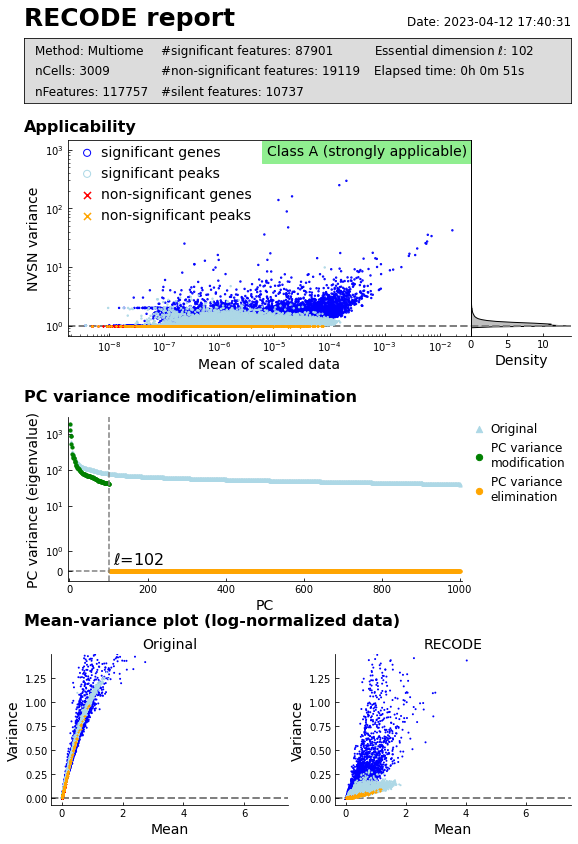

In [5]:
recode.report()